In [1]:
#importing all the module which is used in this given dataset
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import warnings as w
w.filterwarnings('ignore')
import sklearn 
import imblearn

In [2]:
#loading the heart.csv dataset by using read_csv() built in function of pandas library
df=pd.read_csv(r'C:\Users\shaik/heart.csv')
df.head()
#below result we can conclude that the output variable(target column) datatype is 
#discrete/categorical/object  so we r using logistic regression algo which is a part of
#supervised ML algo

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# now cleaning the datatset

In [3]:
#checking the null value present or not in this given dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
#cross checking the null value present or not by finding the
#dtype of column and comparing with those column record datatype
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


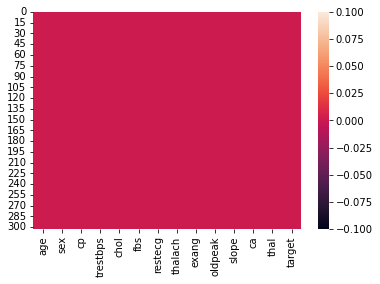

In [6]:
#visualizing the null value 
sb.heatmap(df.isnull())
plt.show()

In [7]:
#checking for duplicates records
df.duplicated().sum()

1

In [8]:
#now dropping the duplicate record in this given dataset 
df.drop_duplicates(inplace=True)

In [9]:
#cross checking duplicates records removed or not
df.duplicated().sum()

0

In [10]:
#as we know that in given dataset the output variable is target and its dtype is discrete type
#so we r using classificatiuon algorithm in it
#checking how many unique records present in output variable(target)
df['target'].unique()

array([1, 0], dtype=int64)

In [11]:
#above result we can conclude that the output variable are binary classs classifier
#now checking the frequency of binary class classifier....and also checking that binary classifier
#balanced or not balanced
df['target'].value_counts()

#if difference btn 1 and 0 is more than 50% so we can say it is unbalanced data in quantity
#if difference btn 1 and 0 is less than 50% so we can say it is balanced data in quantity
#so we have to make the balance data in quantity by using 
#RandomOverSampler class of imblearn library
#and on that class we have one inbult method known as fit_resample(x_train,y_test)
#calling the class
#from sklearn.over_sampling import RandomOverSampler class
#in which we r converting minority data into majority data

1    164
0    138
Name: target, dtype: int64

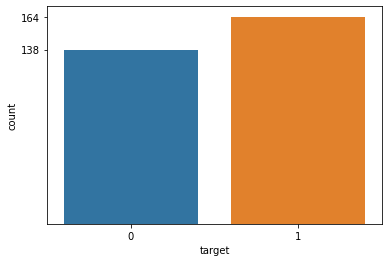

In [12]:
#if i want to visualize the output variable data is balanced or not
#it achieve by using countplot graph of seaborn library
sb.countplot(data=df,x='target')
f=df['target'].value_counts()
plt.yticks(f)
plt.show()
#below result we can both clearly say that binary class classifier are balanced in quantity

In [13]:
#creating a user defined function
def function(model):
    #training the model by 70% train data
    model.fit(x_train,y_train)
    #testing the model by 30% test data
    y_predict=model.predict(x_test)
    #getting classification report in it
    from sklearn.metrics import confusion_matrix,classification_report
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    return model

In [14]:
#selecting input and output variable
x=df.drop('target',axis=1) # 2d array hona chahiye
y=df['target']             #1d array hona chahiye

In [15]:
#before giving this dataset to the classification algo
#first we have to bifurgate the dataset into 70:30 ratio
#by using train_test_split class constructor of sklearn library
from sklearn.model_selection import train_test_split

In [16]:
#creating an object of train_test_split class
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [17]:
#now applying scaling on input variable 
#it achieve by using standardscaler class of sklearn library
from sklearn.preprocessing import StandardScaler
#creating an object of StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)  #fit_transform(passing a 2d array) ==>convert into 2d numpy array
x_test=ss.transform(x_test)

In [18]:
x_train.ndim,x_test.ndim

(2, 2)

In [19]:
#preparing the model by using 1st classification algo named as logistic regression algorithm
#calling the class
from sklearn.linear_model import LogisticRegression

In [20]:
#creating an object of LogisticRegression class
lr=LogisticRegression(random_state=1)

In [21]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [22]:
#now training the model and testing the model and getting classification report by calling function
lr=function(lr)
#below result we can conclude that recall accuracy of model 0&1 is coming out to be good but
#not best ....we can improve the recalll accuracy ...bcoz we have not seected fetures yet

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.85      0.83      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[30  8]
 [ 9 44]]


now doing feature selection and find out which input variable is impt to find output 
it achieve by using 2nd classification algo named as decisiontreeclassifier algo
working on 2 method entropy method and gini index method
entropy formula= -p(yes)*log10(p)-q(no)*log10*(q)
gini index= 1-p(yes)^2-q(no)^2


# applying 2nd classification algo  decisiontreeclassifer..by using this algo we r doing the feature selection of the model

In [23]:
#preparing the model by using decisiontreeclassifer algo
#calling the class
from sklearn.tree import DecisionTreeClassifier

In [24]:
#it return each input variable information gain value to its DecisionTreeClassifier class object
#creating an object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1) #by default working on gini index method


In [25]:
#now training the model and testing the model and getting classification report by calling function
dt=function(dt)
#bcoz of limitation of DecisionTreeClassifier class
#the recall accuracy of model of 0&1 is coming out to be less bcoz the model is overfitted

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        38
           1       0.82      0.70      0.76        53

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.75      0.74      0.74        91

[[30  8]
 [16 37]]


In [26]:
#now checkng information gain value return in DecisionTreeClassifier class object
dt.feature_importances_
dict={'feature':x.columns,'ig':dt.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('ig',ascending=False,ignore_index=True)

,feature,ig
0,cp,0.317338
1,chol,0.113529
2,ca,0.113295
3,thal,0.088533
4,age,0.085167
5,exang,0.081387
6,thalach,0.073287
7,oldpeak,0.061444
8,trestbps,0.045681
9,sex,0.020339


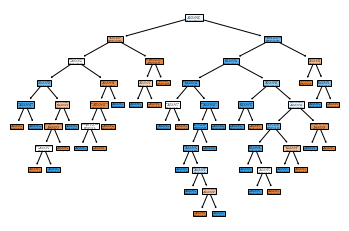

In [27]:
#tree formation
feature=x.columns
from sklearn.tree import plot_tree 
_=plot_tree(dt,feature_names=feature,filled=True)


in order to avoid overfitting model we have to pruning technique having 2 parameter
1)max_depth<=8 we r cutting bottom branch of tree by using this parameter 
bcoz we now that less impt features comes at bottom of tree
2)min_samples_leaf (leaf means leaf node ===>no child) indirectly controlling the depth of tree
min_samples_leaf>=45 and <=100 

# pruning technique(max_depth parameter)

In [28]:
#preparing the model by using DecisionTreeClassifier class
#creating a class object
dt1=DecisionTreeClassifier(random_state=1,max_depth=5)
#calling the function
dt1=function(dt1)
dt1

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[29  9]
 [13 40]]


DecisionTreeClassifier(max_depth=5, random_state=1)

In [29]:
#now checkng information gain value return in DecisionTreeClassifier class object
dt1.feature_importances_
dict={'feature':x.columns,'ig':dt1.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('ig',ascending=False,ignore_index=True)

,feature,ig
0,cp,0.361569
1,ca,0.112162
2,chol,0.103363
3,exang,0.092731
4,thalach,0.074478
5,thal,0.068385
6,oldpeak,0.059179
7,age,0.057939
8,trestbps,0.047021
9,sex,0.023174


In [30]:
#hit and trial method
#we r finding at what min no depth pe we r getting recall accuracy good comparative to others
'''for i in range(8,0,-1):
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print('no of depth: ',i)
    #calling the function
    dt1=function(dt1)
    dt1
    print()
    '''
#below result we can conclude that at depth of 5 we r getting recall accuracy good

"for i in range(8,0,-1):\n    dt1=DecisionTreeClassifier(random_state=1,max_depth=i)\n    print('no of depth: ',i)\n    #calling the function\n    dt1=function(dt1)\n    dt1\n    print()\n    "

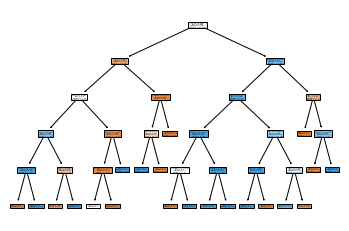

In [31]:
#tree formation
feature=x.columns
from sklearn.tree import plot_tree 
_=plot_tree(dt1,feature_names=feature,filled=True)


In [32]:
#now applying 2nd pruning technique===>min_samples_leaf>=45 and<=100

In [33]:
#hit and trial method
#finding out at what min no of min sample leaf we r getting recall accuracy good
'''for i in range(45,101,1):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print('min no of samples: ',i)
    #calling the function
    dt2=function(dt2)
    dt2
    print()'''
#at 45 no of min sample leaf we r getting recall accuracy comparatives to others
    

"for i in range(45,101,1):\n    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)\n    print('min no of samples: ',i)\n    #calling the function\n    dt2=function(dt2)\n    dt2\n    print()"

In [34]:
#creating a class object
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#calling the function
dt2=function(dt2)
dt2

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]


DecisionTreeClassifier(min_samples_leaf=45, random_state=1)

In [35]:
#now checkng information gain value return in DecisionTreeClassifier class object
dt2.feature_importances_
dict={'feature':x.columns,'ig':dt2.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('ig',ascending=False,ignore_index=True)

,feature,ig
0,cp,0.704874
1,ca,0.218659
2,age,0.076467
3,sex,0.000000
4,trestbps,0.000000
5,chol,0.000000
6,fbs,0.000000
7,restecg,0.000000
8,thalach,0.000000
9,exang,0.000000


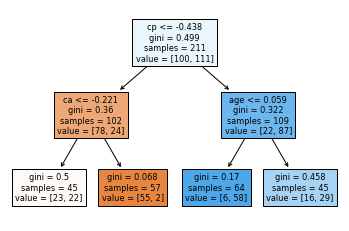

In [36]:
#tree formation
feature=x.columns
from sklearn.tree import plot_tree 
_=plot_tree(dt2,feature_names=feature,filled=True)


# now applying decisiontreeclassifer algo using entropy method

In [37]:
#it return each input variable information gain value to its DecisionTreeClassifier class object
#creating an object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1,criterion='entropy')
#calling the function
dt=function(dt)
dt
#bcoz of limitation of DecisionTreeClassifier class the model become overfitted 
#in order to avoid overfitting we r using pruning technique

              precision    recall  f1-score   support

           0       0.64      0.74      0.68        38
           1       0.79      0.70      0.74        53

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.72        91

[[28 10]
 [16 37]]


DecisionTreeClassifier(criterion='entropy', random_state=1)

In [38]:
#now checkng information gain value return in DecisionTreeClassifier class object
dt.feature_importances_
dict={'feature':x.columns,'ig':dt.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('ig',ascending=False,ignore_index=True)

,feature,ig
0,cp,0.243182
1,ca,0.129411
2,age,0.108986
3,thal,0.097910
4,trestbps,0.096058
5,thalach,0.089420
6,chol,0.083485
7,exang,0.077822
8,oldpeak,0.045352
9,sex,0.028375


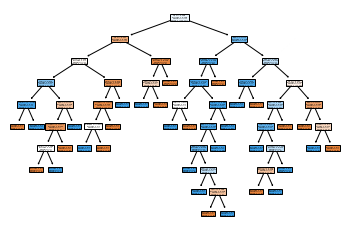

In [39]:
#tree formation
feature=x.columns
from sklearn.tree import plot_tree 
_=plot_tree(dt,feature_names=feature,filled=True)


In [40]:
#hit and trial method
#we r finding at what min no depth pe we r getting recall accuracy good comparative to others
'''for i in range(8,0,-1):
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy')
    print('no of depth: ',i)
    #calling the function
    dt1=function(dt1)
    dt1
    print()'''
#at depth 3 we r getting recall accuracy good

"for i in range(8,0,-1):\n    dt1=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy')\n    print('no of depth: ',i)\n    #calling the function\n    dt1=function(dt1)\n    dt1\n    print()"

In [41]:
dt1=DecisionTreeClassifier(random_state=1,max_depth=3,criterion='entropy')
#calling the function
dt1=function(dt1)
dt1

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        38
           1       0.85      0.74      0.79        53

    accuracy                           0.77        91
   macro avg       0.77      0.78      0.77        91
weighted avg       0.78      0.77      0.77        91

[[31  7]
 [14 39]]


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [42]:
#now checkng information gain value return in DecisionTreeClassifier class object
dt1.feature_importances_
dict={'feature':x.columns,'ig':dt1.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('ig',ascending=False,ignore_index=True)

,feature,ig
0,cp,0.427973
1,ca,0.190567
2,exang,0.113936
3,age,0.090597
4,trestbps,0.063892
5,oldpeak,0.063100
6,sex,0.049937
7,chol,0.000000
8,fbs,0.000000
9,restecg,0.000000


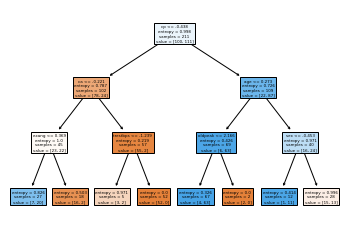

In [43]:
#tree formation
feature=x.columns
from sklearn.tree import plot_tree 
_=plot_tree(dt1,feature_names=feature,filled=True)


In [44]:
#hit and trial method
#finding out at what min no of min sample leaf we r getting recall accuracy good
'''for i in range(45,101,1):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')
    print('min no of samples: ',i)
    #calling the function
    dt2=function(dt2)
    dt2
    print()'''
#at 45 no of min sample we r getting recal accuracy good comparatives to others

"for i in range(45,101,1):\n    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')\n    print('min no of samples: ',i)\n    #calling the function\n    dt2=function(dt2)\n    dt2\n    print()"

In [45]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion='entropy')
#calling the function
dt2=function(dt2)
dt2

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=45, random_state=1)

In [46]:
#now checkng information gain value return in DecisionTreeClassifier class object
dt2.feature_importances_
dict={'feature':x.columns,'ig':dt2.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('ig',ascending=False,ignore_index=True)

,feature,ig
0,cp,0.623586
1,ca,0.277669
2,age,0.098745
3,sex,0.000000
4,trestbps,0.000000
5,chol,0.000000
6,fbs,0.000000
7,restecg,0.000000
8,thalach,0.000000
9,exang,0.000000


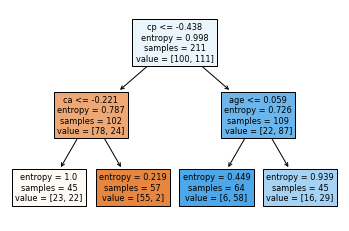

In [47]:
#tree formation
feature=x.columns
from sklearn.tree import plot_tree 
_=plot_tree(dt2,feature_names=feature,filled=True)


# now applying 3rd classification algo named as randomforestreeclassiifer algo working on both method entropy/gini index method

In [48]:
#preparing the model by using RandomForestTreeClassifier algo
#calling the class
from sklearn.ensemble import RandomForestClassifier
#creating an object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=5,random_state=1) 
#by default working on gini index method
#calling the function
rfc=function(rfc)
rfc

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[29  9]
 [13 40]]


RandomForestClassifier(max_features=5, n_estimators=10, random_state=1)

In [49]:
#hit and trial method 
#mainly focusing on randomly features and record are selected by machine 
#and train that randomly data on each decisiontree algo se
#so we r finding at what no of features we r getting recall accuracy good comparatives to others
x.shape
'''for i in range(13,0,-1):
    #creating an object of RandomForestClassifier
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    print('at what no of features:',i)
    #calling the function
    rfc=function(rfc)
    rfc
    print()'''
#below result we can conclude that at 5 no of features pe dt accuracy for recall coming out tobe good
    

"for i in range(13,0,-1):\n    #creating an object of RandomForestClassifier\n    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)\n    print('at what no of features:',i)\n    #calling the function\n    rfc=function(rfc)\n    rfc\n    print()"

# randomforesttree classifer for entropy method

In [50]:
#hit and trial method 
#so we r finding at what no of features we r getting recall accuracy good comparatives to others
'''for i in range(13,0,-1):
    #creating an object of RandomForestClassifier
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion='entropy')
    print('at what no of features:',i)
    #calling the function
    rfc=function(rfc)
    rfc
    print()'''
#below result at 4 no of features we r getting recall accuracy good comparative to others

"for i in range(13,0,-1):\n    #creating an object of RandomForestClassifier\n    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion='entropy')\n    print('at what no of features:',i)\n    #calling the function\n    rfc=function(rfc)\n    rfc\n    print()"

In [51]:
#creating an object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=4,random_state=1,criterion='entropy') 
#by default working on entropy method
#calling the function
rfc=function(rfc)
rfc

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        38
           1       0.84      0.79      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[30  8]
 [11 42]]


RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=10,
                       random_state=1)

# next classification algo:- i am refering named as adaboostclassifer algo

In [52]:
#ada boost classifer ===>(part of ensembling technique)
#create a decision stump (means 1 root node and 2 leaf node called a weak learner) 
#indirctly formation of tree wrt to information gain value of each feature ka


In [53]:
#preparing the model by using ada(adaptorboost ) algorithm
#calling the class
from sklearn.ensemble import AdaBoostClassifier

In [54]:
#its a hit and trial method
#at what min of feature of dt tree we r getting recall accuracy good comparative to others
'''for i in range(13,0,-1):
    #creating an object of ada boost class
    abc=AdaBoostClassifier(n_estimators=i,random_state=1)
    print('at what no of decision stump:',i)
    #calling the function
    abc=function(abc)
    abc
    print()'''
#below result we can conclude at 3 no of feature or decision stump
#pe we r getting recall accurcy good
    

"for i in range(13,0,-1):\n    #creating an object of ada boost class\n    abc=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print('at what no of decision stump:',i)\n    #calling the function\n    abc=function(abc)\n    abc\n    print()"

In [55]:
#creating an object of ada boost class
abc=AdaBoostClassifier(n_estimators=3,random_state=1)
#calling the function
abc=function(abc)
abc

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        38
           1       0.82      0.79      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

[[29  9]
 [11 42]]


AdaBoostClassifier(n_estimators=3, random_state=1)

# next classification algo refering:-gradientboosting algo

part of ensembling technique
it create a full grown tree and focusing on short coming residual error 2nd iteration
by creating next decision tree
min dt>=10 and goes upto max<=100

In [56]:
#preparing the model by using gradientboosting algorithm
#calling the class
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
#it is also hit and trial method 
#to find out 70% training data reqd how many dt (decision tree) to find the recall accuracy of model
'''for i in range(10,101,1):
    #creating an object 
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('at what no of dt: ',i)
    #calling the function
    gbc=function(gbc)
    gbc
    print()'''
#below result we can conclude that at 10 no of dt we r getting recall accuracy good

"for i in range(10,101,1):\n    #creating an object \n    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print('at what no of dt: ',i)\n    #calling the function\n    gbc=function(gbc)\n    gbc\n    print()"

In [58]:
#creating an object 
gbc=GradientBoostingClassifier(n_estimators=10,random_state=1)
#calling the function
gbc=function(gbc)
gbc

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.79      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[28 10]
 [11 42]]


GradientBoostingClassifier(n_estimators=10, random_state=1)

# next classification algo: we r refering named is extremegradientboosting classifier algo

extremegradientboosting classifier represent by XGBClassifier part of xgboost class of sklearn library
xgb algo is advance algo of gradient boosting
it will take care outlier and overfitting automatically
it take less space memory other than any algo
very fast processing
suitable for verylarge data ke liye
used for multithreading
used for parallel processing

In [59]:
import xgboost

In [60]:
#preparing the model by using xgbclassifier algo
#calling the class
from xgboost import XGBClassifier
#it also create full grown tree and focusing on short coming residualerror for every iteration

In [61]:
#hit and trial method
#to find out 70% training data reqd how many dt (decision tree) to find the recall accuracy of model
'''for i in range(10,101):
    #creating an object of XGBClassifier class
    xgb=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print('at what no of dt: ',i)
    #calling function
    xgb=function(xgb)
    xgb
    print()'''
#below result we can conclude that at 10 no of dt we r getting recall accuracy good 

"for i in range(10,101):\n    #creating an object of XGBClassifier class\n    xgb=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)\n    print('at what no of dt: ',i)\n    #calling function\n    xgb=function(xgb)\n    xgb\n    print()"

In [62]:
#creating an object of XGBClassifier class
xgb=XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)
#calling function
xgb=function(xgb)
xgb

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

[[29  9]
 [12 41]]


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=1, reg_lambda=1, ...)

# next classification algo that we r refering:-knn algo k means nearest neighbors datapoint


#preparing the model by using knn algo
if large data present in the dataset mei it is not recommended this algo
calling the class

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
#creating an object of KNeighborsClassifier class
knn=KNeighborsClassifier(n_neighbors=7,p=2)

In [65]:
#now training the model and testing the model and geting classification report by calling the function
knn=function(knn)
knn

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        38
           1       0.85      0.85      0.85        53

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

[[30  8]
 [ 8 45]]


KNeighborsClassifier(n_neighbors=7)

# next classification algo we r refering: naive bayes classification algo

its gaussian naive bayes classification algo
generally it is suitable for small data
if dataset having any feature datatype is object/categorical dtype 
so this algo isn't suitable
that time we have use bernoullis naive bayes ===>in nlp 
it working on the mechanism of conditional probability
p(a|b)===>finding prob of  'a' wrt to given prob 'b'

In [66]:
from sklearn.naive_bayes import GaussianNB
#creating an object of GaussianNB
gnb=GaussianNB()

In [67]:
#now training the model and testing the model and geting classification report by calling the function
gnb=function(gnb)
gnb

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        38
           1       0.85      0.77      0.81        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91

[[31  7]
 [12 41]]


GaussianNB()

# next classification algo we r refering:-support vector machine(svm)

In [68]:
#preparing the model by using svm algo
#by calling the class
from sklearn.svm import LinearSVC

In [69]:
#creating an object of LinearSVC class
svc=LinearSVC(random_state=1)

In [70]:
#calling the function
svc=function(svc)


              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[29  9]
 [ 9 44]]


In [71]:
#now adding some external error c=0.001 to 1 in passing inside svc class object 
#and then checking accuracy of model is changing or not
#if not change recall accuracy ===>means its is non linear seperatable data
#if change means by adding this c error it prevent overfitting model and handle outlier automatically


In [72]:
#creating an object of LinearSVC class
svc=LinearSVC(random_state=1,C=0.95)
#calling the function
svc=function(svc)
#below result we can conclude that recall accuracy after adding some external error is not changing
#it happen bcoz of the quality of data is non linear seperatable...so it s difficult to formed
#decision boundry/hyperplane graph se 1d kum rehta hai
#in order to make non linear seperatable to become seperatble by using kernel function
#2 type
#a)polynomila kernel function(we r increasing the degree of graph from 1d to 2d ...2d to 3d)
#2) radial kernel function

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[29  9]
 [ 9 44]]


In [73]:
#calling the class
from sklearn.svm import SVC

In [74]:
#creating an object of non linear seperatable data
svc1=SVC(kernel='poly',random_state=1)
#now training the model and testing the model and geting classification report by calling the function
svc1=function(svc1)
svc1

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        38
           1       0.84      0.87      0.85        53

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

[[29  9]
 [ 7 46]]


SVC(kernel='poly', random_state=1)

In [75]:
#creating an object of radialbasis kernel function
#from sklearn.svm import SVC
svc2=SVC(random_state=1,kernel='rbf')
#now training the model and testing the model and geting classification report by calling the function
svc2=function(svc2)
svc2

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.79      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[28 10]
 [11 42]]


SVC(random_state=1)

In [76]:
#below result we can conclude that for this dataset polynomial kernel function is suitable 
#and recall accuracy is coming out tobe 87 and 76%